In [1]:
from bentdna.persistence_length import LpWindows
import matplotlib.pyplot as plt
import numpy as np
bentna_folder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
n_frames_per_window = 5000
l_agent = LpWindows(bentna_folder, host, n_frames_per_window)

In [3]:
l_agent.get_split_frame_list()

[(0, 4999),
 (2500, 7499),
 (5000, 9999),
 (7500, 12499),
 (10000, 14999),
 (12500, 17499),
 (15000, 19999),
 (17500, 22499),
 (20000, 24999),
 (22500, 27499),
 (25000, 29999),
 (27500, 32499),
 (30000, 34999),
 (32500, 37499),
 (35000, 39999),
 (37500, 42499),
 (40000, 44999),
 (42500, 47499),
 (45000, 49999)]

### Part 2: Read Dataframe

In [3]:
l_agent.read_df_an()

Read df_an from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder/an_0_9_bpfirst3_bplast17.csv


In [5]:
l_agent.df_an.head()

,0,1,2,3,4,5,6,7,8,9
0,0.472659,-0.082037,-0.083300,-0.060492,-0.014238,0.032104,0.011171,0.012139,-0.010040,-0.012814
1,0.372355,-0.112163,0.070121,0.000105,0.009575,-0.049337,-0.007295,-0.019887,0.004396,-0.003486
2,0.562723,-0.116956,0.093044,-0.038627,-0.073007,-0.068122,0.020503,-0.021716,-0.007891,0.001465
3,0.428166,-0.167618,0.008348,0.021849,0.051480,-0.028985,-0.002691,-0.012772,-0.000884,-0.002050
4,0.471383,-0.037604,0.005544,-0.060761,0.010258,-0.017149,0.031898,-0.010619,-0.001598,0.004935


### Part 3: Split all frames data into time windows

In [4]:
l_agent.set_split_df_list()

In [8]:
#split_df_list = l_agent.get_split_df_list()
#split_df_list[1]

### Part 4: Make/Read Lp of all windows

In [5]:
execute = True
if execute:
    l_agent.set_lp_store_array()
    l_agent.save_lp_store_array()

Start to process Window-0
Start to process Window-1
Start to process Window-2
Start to process Window-3
Start to process Window-4
Start to process Window-5
Start to process Window-6
Start to process Window-7
Start to process Window-8
Start to process Window-9
Start to process Window-10
Start to process Window-11
Start to process Window-12
Start to process Window-13
Start to process Window-14
Start to process Window-15
Start to process Window-16
Start to process Window-17
Start to process Window-18
Save Lp of all windows into /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder/lp_store_array.npy


In [6]:
l_agent.read_lp_store_array()

Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder/lp_store_array.npy


### Part 5: Plot $L_p$ for Group 1

In [9]:
n_frames_per_window = 5000
group1_hosts = ['a_tract_21mer', 'tat_21mer', 'g_tract_21mer', 'gcgc_21mer']

In [10]:
d_colors = {'a_tract_21mer': 'blue', 'atat_21mer': 'orange', 'ctct_21mer': 'green',
                'g_tract_21mer': 'red', 'gcgc_21mer': 'magenta', 'tgtg_21mer': 'cyan', 
                'tat_21mer': 'purple', 'tat_1_21mer': 'magenta', 'tat_2_21mer': 'green',
                'tat_3_21mer': 'cyan'}

abbr_hosts = {'a_tract_21mer': 'A-tract', 'ctct_21mer': 'CTCT', 'gcgc_21mer': 'CpG',
                  'g_tract_21mer': 'G-tract', 'atat_21mer': 'ATAT', 'tgtg_21mer': 'TGTG', 
                  'tat_21mer': 'A-junction', 'tat_1_21mer': 'TAT-1', 'tat_2_21mer': 'TAT-2', 'tat_3_21mer': 'TAT-3'} 

Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/an_folder/lp_store_array.npy


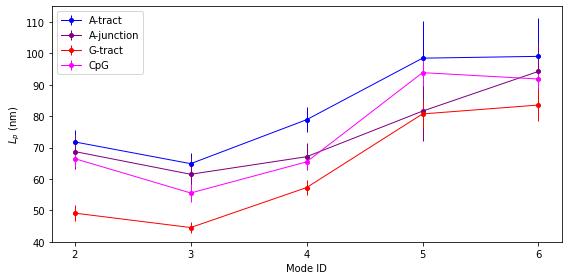

In [21]:
fig, ax = plt.subplots(figsize=(8,4), facecolor="white")
ylims = (40,115)
n_begin = 2
n_end = 6

for host in group1_hosts:
    l_agent = LpWindows(bentna_folder, host, n_frames_per_window)
    l_agent.read_lp_store_array()
    x_array, mean_array, std_array = l_agent.get_nlist_mean_std_array_for_windows(n_begin, n_end)
    ax.errorbar(x_array, mean_array, yerr=std_array, linestyle='-', marker='o', linewidth=1, 
                markersize=4, label=abbr_hosts[host], alpha=1, color=d_colors[host])
ax.legend()
ax.set_ylabel(r'$L_p$ (nm)')
ax.set_xticks(x_array)
ax.set_xlabel("Mode ID")
ax.set_ylim(ylims)

plt.tight_layout()
#plt.savefig('/home/yizaochen/Desktop/drawzone_temp/lp_1.png', dpi=150, transparent=False)
plt.show()

### Part 6: Plot $L_p$ for Group 2

In [19]:
group2_hosts = ['a_tract_21mer', 'tat_21mer', 'tat_1_21mer', 'tat_2_21mer', 'tat_3_21mer', 'atat_21mer']

Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_1_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_2_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_3_21mer/an_folder/lp_store_array.npy
Read Lp from /home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder/lp_store_array.npy


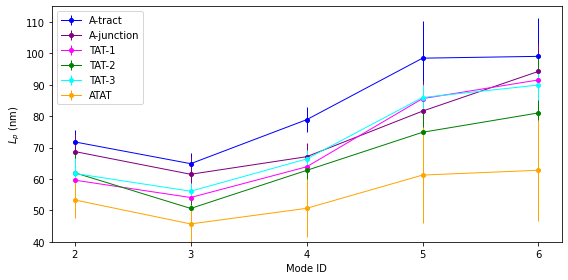

In [22]:
fig, ax = plt.subplots(figsize=(8,4), facecolor="white")
ylims = (40,115)
n_begin = 2
n_end = 6

for host in group2_hosts:
    l_agent = LpWindows(bentna_folder, host, n_frames_per_window)
    l_agent.read_lp_store_array()
    x_array, mean_array, std_array = l_agent.get_nlist_mean_std_array_for_windows(n_begin, n_end)
    ax.errorbar(x_array, mean_array, yerr=std_array, linestyle='-', marker='o', linewidth=1, 
                markersize=4, label=abbr_hosts[host], alpha=1, color=d_colors[host])
ax.legend()
ax.set_ylabel(r'$L_p$ (nm)')
ax.set_xticks(x_array)
ax.set_xlabel("Mode ID")
ax.set_ylim(ylims)

plt.tight_layout()
#plt.savefig('/home/yizaochen/Desktop/drawzone_temp/lp_2.png', dpi=150, transparent=False)
plt.show()

### Batch Run

In [ ]:
hosts = ['g_tract_21mer', 'gcgc_21mer', 'tat_21mer', 'tat_1_21mer', 'tat_2_21mer', 'tat_3_21mer', 'atat_21mer']
n_frames_per_window = 5000
for host in hosts:
    l_agent = LpWindows(bentna_folder, host, n_frames_per_window)
    #l_agent.read_df_an()
    #l_agent.set_split_df_list()
    #l_agent.set_lp_store_array()
    #l_agent.save_lp_store_array()